# 정준상관분석 Canonical Correlation

변수군(변수들의 선형결합)과 변수군 간의 상관계수를 분석하는 방법

In [1]:
sales <- read.table("mvadata/sales.txt", header = T,row.names = 1)

In [2]:
head(sales)

,X1,X2,X3,X4,Y1,Y2,Y3
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,9,12,9,20,93.0,96.0,97.8
2,7,10,10,15,88.8,91.8,96.8
3,8,12,9,26,95.0,100.3,99.0
4,12,14,12,29,101.3,103.8,106.8
5,10,15,12,32,102.0,107.8,103.0
6,10,14,11,21,95.8,97.5,99.3


In [3]:
library(psych)

In [4]:
summary(sales)

       X1              X2              X3              X4       
 Min.   : 1.00   Min.   : 5.00   Min.   : 5.00   Min.   : 9.00  
 1st Qu.: 8.25   1st Qu.:12.00   1st Qu.: 9.00   1st Qu.:21.50  
 Median :10.00   Median :15.00   Median :11.00   Median :31.50  
 Mean   :11.20   Mean   :14.18   Mean   :10.56   Mean   :29.76  
 3rd Qu.:14.00   3rd Qu.:17.00   3rd Qu.:12.00   3rd Qu.:37.00  
 Max.   :18.00   Max.   :20.00   Max.   :15.00   Max.   :51.00  
       Y1               Y2              Y3        
 Min.   : 81.50   Min.   : 87.3   Min.   : 94.30  
 1st Qu.: 93.55   1st Qu.: 99.5   1st Qu.: 99.08  
 Median :100.65   Median :106.2   Median :103.15  
 Mean   : 98.84   Mean   :106.6   Mean   :102.81  
 3rd Qu.:105.05   3rd Qu.:114.8   3rd Qu.:106.45  
 Max.   :110.80   Max.   :122.3   Max.   :115.30  

In [5]:
SD(sales)

X1        X2        X3        X4        Y1        Y2        Y3 
 3.943478  3.384780  2.139617 10.537707  7.337345 10.124315  4.712218

In [6]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [7]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [8]:
library(CCA)

Loading required package: fda

Loading required package: Matrix


Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading required package: fields

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


Attaching package: ‘fields’


The following object is masked from ‘package:psych’:

    describe




In [9]:
exam = sales[,c(1:4)]

In [10]:
perform = sales[, c(5:7)]

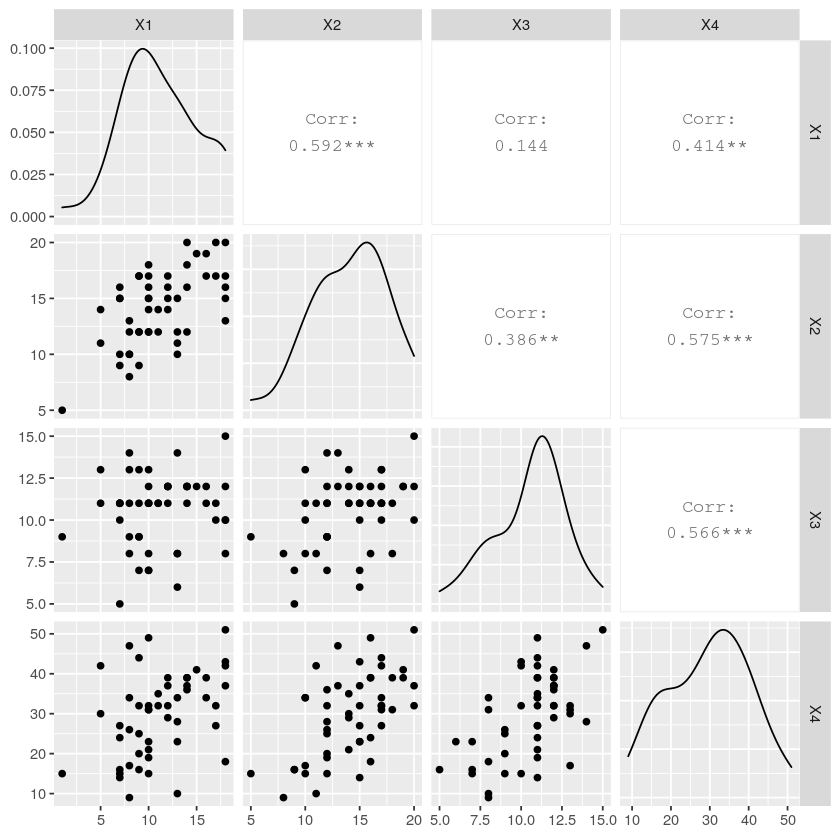

In [11]:
ggpairs(exam)

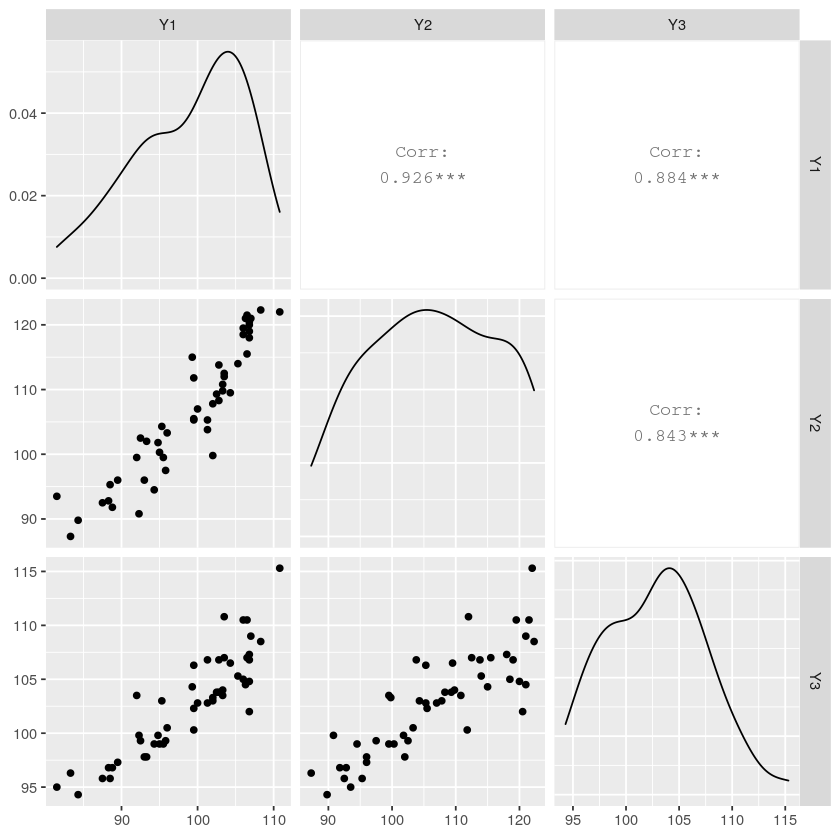

In [12]:
ggpairs(perform)

In [13]:
matcor(exam, perform)

$Xcor
          X1        X2        X3        X4
X1 1.0000000 0.5920105 0.1436729 0.4137107
X2 0.5920105 1.0000000 0.3859502 0.5745533
X3 0.1436729 0.3859502 1.0000000 0.5663721
X4 0.4137107 0.5745533 0.5663721 1.0000000

$Ycor
          Y1        Y2        Y3
Y1 1.0000000 0.9260758 0.8840023
Y2 0.9260758 1.0000000 0.8425232
Y3 0.8840023 0.8425232 1.0000000

$XYcor
          X1        X2        X3        X4        Y1        Y2        Y3
X1 1.0000000 0.5920105 0.1436729 0.4137107 0.5712660 0.5438665 0.6971657
X2 0.5920105 1.0000000 0.3859502 0.5745533 0.7080738 0.7459097 0.6374712
X3 0.1436729 0.3859502 1.0000000 0.5663721 0.6744073 0.4653880 0.6410886
X4 0.4137107 0.5745533 0.5663721 1.0000000 0.9273116 0.9442960 0.8525682
Y1 0.5712660 0.7080738 0.6744073 0.9273116 1.0000000 0.9260758 0.8840023
Y2 0.5438665 0.7459097 0.4653880 0.9442960 0.9260758 1.0000000 0.8425232
Y3 0.6971657 0.6374712 0.6410886 0.8525682 0.8840023 0.8425232 1.0000000

In [14]:
canonical.result <- cc(exam, perform)

In [15]:
names(canonical.result)

[1] "cor"    "names"  "xcoef"  "ycoef"  "scores"

In [18]:
canonical.result$cor

[1] 0.9941528 0.8736326 0.3818977

r1 = (w1, v1), r2 =  (w2, v2), r3 = (w3, v3)

In [16]:
canonical.result$xcoef

X1,-0.06761486,0.19166238,0.24939818
X2,-0.03282084,-0.20075422,-0.14457462
X3,-0.08557668,0.50133656,-0.27278359
X4,-0.06343222,-0.06799141,0.01048697


w = a1x1 + a2x2 + a3x3 + a4x4 <br>
x의 계수들

In [17]:
canonical.result$ycoef

Y1,-0.06089225,0.1767828,-0.3761327
Y2,-0.02343702,-0.2424824,0.1022237
Y3,-0.07526146,0.2370399,0.3847899


v = b1y1 + b2y2 + b3y3 <br>
x의 계수들

In [19]:
canonical.result$scores

1,0.97290017,-0.10250187,0.08968621
2,1.40535598,0.75697544,-0.44517936
3,0.65992174,-0.70211272,-0.09679012
4,-0.12320607,0.96306378,-0.17523649
5,-0.21109383,0.17501057,-0.78714654
6,0.60505806,0.62233376,-0.48514504
7,0.65573909,-0.44245893,0.14212108
8,-2.37805906,0.91671131,-0.13393248
9,-0.29887997,0.34283009,-1.35956633
10,-0.93846464,-0.63787904,0.12291472
11,-0.41196524,0.15682687,-0.57749942


In [20]:
canonical.result$scores$xscores

1,0.97290017,-0.10250187,0.08968621
2,1.40535598,0.75697544,-0.44517936
3,0.65992174,-0.70211272,-0.09679012
4,-0.12320607,0.96306378,-0.17523649
5,-0.21109383,0.17501057,-0.78714654
6,0.60505806,0.62233376,-0.48514504
7,0.65573909,-0.44245893,0.14212108
8,-2.37805906,0.91671131,-0.13393248
9,-0.29887997,0.34283009,-1.35956633
10,-0.93846464,-0.63787904,0.12291472
11,-0.41196524,0.15682687,-0.57749942


각 관측치별 w1, w2, w3의 값

In [21]:
canonical.result$scores$yscores

1,0.98137511,0.35637308,-0.81850784
2,1.41081951,0.39527125,-0.05288030
3,0.66849767,-0.04828754,-0.66946319
4,-0.38419247,2.06566748,0.32004553
5,-0.23457158,0.31873419,-0.99655408
6,0.66282908,0.84320133,-1.14115880
7,0.65680116,0.23408976,-0.93930850
8,-2.02894501,1.34676466,1.87797162
9,-0.35521306,0.52855122,-0.93851640
10,-0.74924307,-2.14927431,-1.88853930
11,-0.43586700,0.30062706,-0.89628914


각 v1, v2, v3의 값

In [22]:
canonical.result$scores$corr.X.xscores

X1,-0.6352483,0.2112406,0.65565759
X2,-0.7236603,-0.2297134,-0.06888076
X3,-0.6428658,0.5132111,-0.56862746
X4,-0.9462723,-0.1866690,-0.09433235


In [23]:
canonical.result$scores$corr.Y.xscores

Y1,-0.9743097,0.009650714,-0.075803677
Y2,-0.9442884,-0.273145316,0.002605397
Y3,-0.9439746,0.170594666,0.093754591


In [24]:
canonical.result$scores$corr.X.yscores

X1,-0.6315339,0.1845467,0.25039414
X2,-0.7194289,-0.2006851,-0.02630541
X3,-0.6391068,0.4483580,-0.21715753
X4,-0.9407393,-0.1630801,-0.03602531


In [25]:
canonical.result$scores$corr.Y.yscores

Y1,-0.9800402,0.01104665,-0.198492088
Y2,-0.9498424,-0.31265469,0.006822237
Y3,-0.9495266,0.19527050,0.245496595


corX.xscores: w와 x들의 상관계수 행렬 <br>
w가 만들어질 때 x의 기여도<br>
w1이 만들어질 때 x4:수리점수의 기여도가 높다

# 크론바흐 알파 

설문문항의 신뢰도를 파악

$\alpha = {k \over k-1} (1 - {\sum\sigma^2_i \over \sigma^2_X})$, k는 문항의 갯수, $\sigma^2_X$는 문항의 합의 분산 $\sum\sigma^2_i$는 문항의 분산의 합

문항이 독립이면 공분산이 0이 되므로 $\sigma^2_X$과 $\sum\sigma^2_i$이 같아져서 1-1 = 0이 되므로 크론바흐 알파가 0이 됨 <br>
크론바흐 알파가 높아야 문항이 서로 관계가 있는 거임

In [26]:
library(psych)

In [27]:
health = read.csv("mvadata/보건관리데이터.csv", header = T)

In [28]:
head(health)

,id,q1,q2,q3,q4,q5,q6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,4,4,1,4,4,1
2,2,3,1,2,1,2,2
3,3,2,1,2,1,3,3
4,4,1,2,1,2,2,3
5,5,2,1,1,4,1,1
6,6,2,2,1,2,2,2


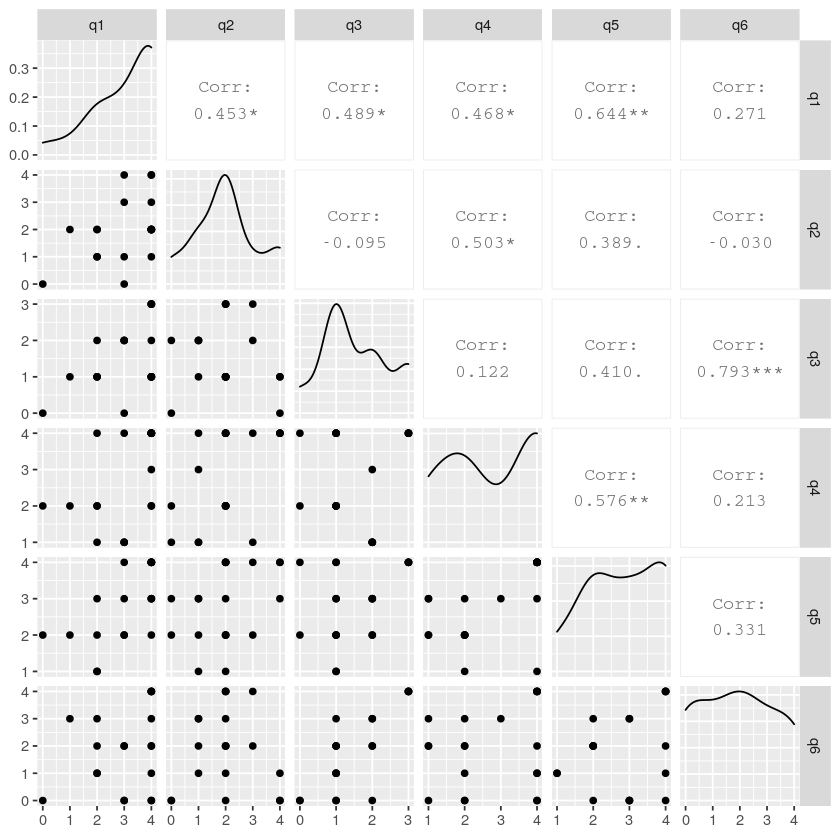

In [31]:
ggpairs(health[,-1])

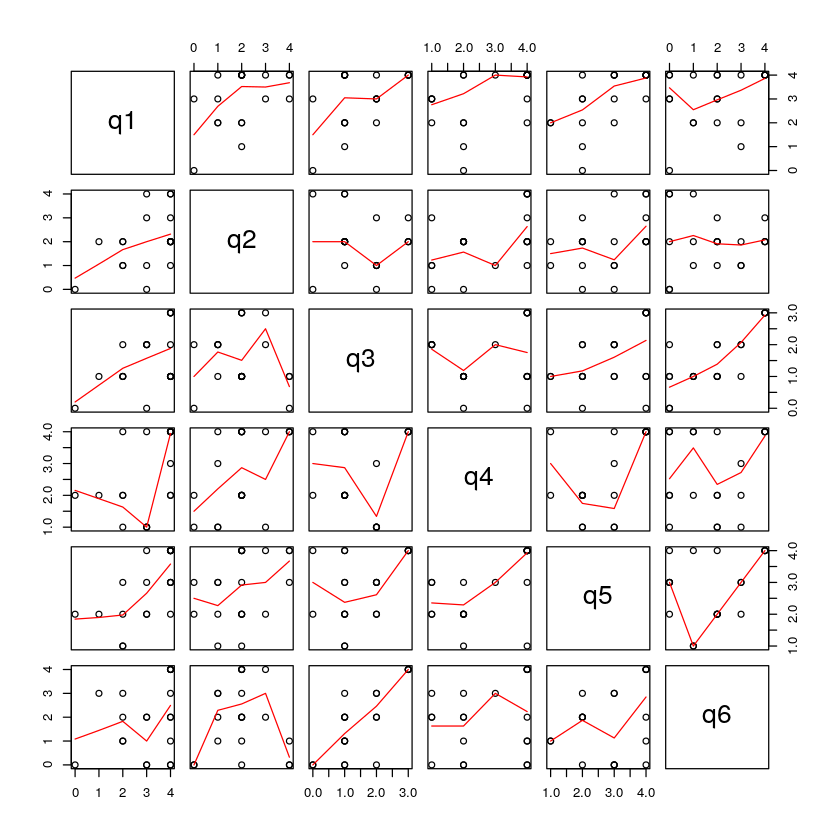

In [32]:
pairs(health[, -1], panel = panel.smooth)

In [39]:
psych::alpha(health[,-1])


Reliability analysis   
Call: psych::alpha(x = health[, -1])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.77      0.78    0.86      0.37 3.5 0.084  2.4 0.81     0.41

 lower alpha upper     95% confidence boundaries
0.6 0.77 0.93 

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
q1      0.69      0.70    0.79      0.32 2.4    0.114 0.076  0.36
q2      0.77      0.79    0.85      0.43 3.8    0.083 0.042  0.44
q3      0.73      0.76    0.76      0.38 3.1    0.097 0.039  0.42
q4      0.72      0.74    0.83      0.37 2.9    0.101 0.074  0.40
q5      0.69      0.70    0.81      0.32 2.3    0.114 0.075  0.36
q6      0.77      0.77    0.80      0.40 3.3    0.079 0.049  0.46

 Item statistics 
    n raw.r std.r r.cor r.drop mean   sd
q1 20  0.79  0.80  0.77   0.67  3.0 1.19
q2 20  0.54  0.54  0.43   0.33  2.0 1.17
q3 20  0.65  0.66  0.65   0.52  1.6 0.94
q4 20  0.71  0.70  0.61   0.53  2.8 1.25
q5 20  0.80 

raw_alpha가 0.77 표준화한 std_alpha가 0.78 그리고 신뢰구간이 (0.6, 0.93)

Reliability if an item is dropped는 각 문항 하나가 제거 되었을 때 크론바흐 알파를 나타낸다. 예를 들어 q1을 빼면 알파가 0.69가 되므로 빼지 않는 것이 좋다.